# Import Required Libraries
Import libraries such as os, ast, json, and networkx for file handling, parsing, and visualization.

In [13]:
# Import Required Libraries
from pathlib import Path
import ast
import json
import networkx as nx
import matplotlib.pyplot as plt
import re

In [14]:
# Identify Third-Party Packages
import sys
import pkgutil


# Parse Python Files for Imports
Use the ast module to parse `.py` files and extract imported modules and packages.

In [ ]:
# Parse Python Files for Imports
def parse_python_imports(file_path):
    with file_path.open("r", encoding="utf-8") as file:
        tree = ast.parse(file.read(), filename=str(file_path))
    imports = set()
    for node in ast.walk(tree):
        if isinstance(node, ast.Import):
            for alias in node.names:
                imports.add(alias.name)
        elif isinstance(node, ast.ImportFrom):
            if node.module:
                imports.add(node.module)
    return imports


Parsed imports from Python files.


# Parse Jupyter Notebooks for Imports
Read `.ipynb` files as JSON and extract code cells to identify imported modules and packages.

In [ ]:
# Parse Jupyter Notebooks for Imports
def parse_notebook_imports(file_path):
    with file_path.open("r", encoding="utf-8") as file:
        notebook = json.load(file)
    imports = set()
    for cell in notebook.get("cells", []):
        if cell.get("cell_type") == "code":
            try:
                tree = ast.parse("".join(cell.get("source", [])), filename=str(file_path))
                for node in ast.walk(tree):
                    if isinstance(node, ast.Import):
                        for alias in node.names:
                            imports.add(alias.name)
                    elif isinstance(node, ast.ImportFrom):
                        if node.module:
                            imports.add(node.module)
            except SyntaxError:
                pass
    return imports


Parsed imports from Jupyter notebooks.


# Identify Third-Party Packages
Differentiate between standard library modules, local modules, and third-party packages.

In [ ]:
def import_categorization(python_imports)
    # Use sys.stdlib_module_names for accurate standard library detection
    standard_libs = set(sys.stdlib_module_names)

    # Update third-party package identification logic
    third_party_packages = set()
    for _, module_name, is_pkg in pkgutil.iter_modules():
        if module_name not in standard_libs:
            third_party_packages.add(module_name)

    def categorize_imports(imports):
        categorized = {"standard": set(), "third_party": set(), "local": set()}
        for imp in imports:
            if imp in sys.builtin_module_names or imp in standard_libs:
                categorized["standard"].add(imp)
            elif imp in third_party_packages:
                categorized["third_party"].add(imp)
            else:
                categorized["local"].add(imp)
        return categorized
    categorized_imports = {file: categorize_imports(imports)
                           for file, imports in python_imports.items()}
    return categorized_imports


# Done to here

# Correct Standard Library and Third-Party Package Identification
Ensure accurate identification of standard library modules and third-party packages.

In [ ]:
# Correct Standard Library and Third-Party Package Identification
import sys
import pkgutil

# Use sys.stdlib_module_names for accurate standard library detection
if hasattr(sys, 'stdlib_module_names'):
    standard_libs = set(sys.stdlib_module_names)
else:
    # Fallback for Python versions < 3.10
    import distutils.sysconfig as sysconfig
    stdlib_path = sysconfig.get_python_lib(standard_lib=True)
    standard_libs = {name for _, name, _ in pkgutil.iter_modules([stdlib_path])}

# Detect installed third-party packages
installed_packages = {name for _, name, _ in pkgutil.iter_modules()}

def categorize_imports(imports):
    categorized = {"standard": set(), "third_party": set(), "local": set()}
    for imp in imports:
        base_module = imp.split('.')[0]  # Consider only the base module
        if base_module in standard_libs:
            categorized["standard"].add(base_module)
        elif base_module in installed_packages:
            categorized["third_party"].add(base_module)
        else:
            categorized["local"].add(base_module)
    return categorized

categorized_imports = {file: categorize_imports(imports) for file, imports in {**python_imports, **notebook_imports}.items()}
print("Categorized imports into standard, third-party, and local.")

# Build Module Dependency Tree
Construct a tree structure showing which modules call other modules within the folder.

In [ ]:
def build_dependency_graph(python_imports):
    dependency_graph = nx.DiGraph()
    # Add edges for Python files
    for file, imports in python_imports.items():
        for imp in imports:
            dependency_graph.add_edge(file, imp)
    return dependency_graph


Constructed module dependency tree.


# Filter Dependency Tree
Exclude standard library modules, third-party packages, and their submodules from the dependency tree.

In [ ]:
# Filter Dependency Tree
filtered_dependency_graph = nx.DiGraph()

# Add edges for Python files, using only module names
for file, imports in python_imports.items():
    file_name = os.path.basename(file)
    for imp in imports:
        if not any(imp.startswith(pkg + '.') for pkg in third_party_packages) and imp not in standard_libs and imp not in third_party_packages:
            filtered_dependency_graph.add_edge(file_name, imp)

# Add edges for Jupyter notebooks, using only module names
for file, imports in notebook_imports.items():
    file_name = os.path.basename(file)
    for imp in imports:
        if not any(imp.startswith(pkg + '.') for pkg in third_party_packages) and imp not in standard_libs and imp not in third_party_packages:
            filtered_dependency_graph.add_edge(file_name, imp)

print("Filtered dependency tree constructed using module names.")

Filtered dependency tree constructed using module names.


# Specify Folder Path
Allow the user to specify the folder path to analyze.

In [ ]:
# Specify Folder Path
folder_path = Path(input("Enter the folder path to analyze: ")).resolve()
if not folder_path.exists():
    raise FileNotFoundError(f"The folder path '{folder_path}' does not exist.")

# Find `.py` and `.ipynb` Files
Search the specified folder recursively for all `.py` and `.ipynb` files.

In [ ]:
# Find `.py` and `.ipynb` Files
py_files = list(folder_path.glob('*.py'))
ipynb_files = list(folder_path.glob('*.ipynb'))

print(f"Found {len(py_files)} Python files and {len(ipynb_files)} Jupyter notebooks.")

In [15]:
# Specify Folder Path
folder_path = Path("C:\\Users\\gsalomon\\Python Scripts\\PlanChecking").resolve()
if not folder_path.exists():
    raise FileNotFoundError(f"The folder path '{folder_path}' does not exist.")

# Find `.py` and `.ipynb` Files in the top-level folder only
py_files = list(folder_path.glob('*.py'))
ipynb_files = list(folder_path.glob('*.ipynb'))

print(f"Found {len(py_files)} Python files and {len(ipynb_files)} Jupyter notebooks in the top-level folder.")

Found 34 Python files and 0 Jupyter notebooks in the top-level folder.


In [16]:

python_imports = {file: parse_python_imports(file) for file in py_files}
print("Parsed imports from Python files.")

Parsed imports from Python files.


In [17]:

notebook_imports = {file: parse_notebook_imports(file) for file in ipynb_files}
print("Parsed imports from Jupyter notebooks.")

Parsed imports from Jupyter notebooks.


In [18]:
all_imports = {**python_imports, **notebook_imports}

In [ ]:
categorized_imports = import_categorization(python_imports)
print("Categorized imports into standard, third-party, and local.")

In [ ]:
dependency_graph =build_dependency_graph(all_imports)
print("Constructed module dependency tree.")

# Visualize Dependency Tree
Use a library like networkx or matplotlib to visualize the module dependency tree.

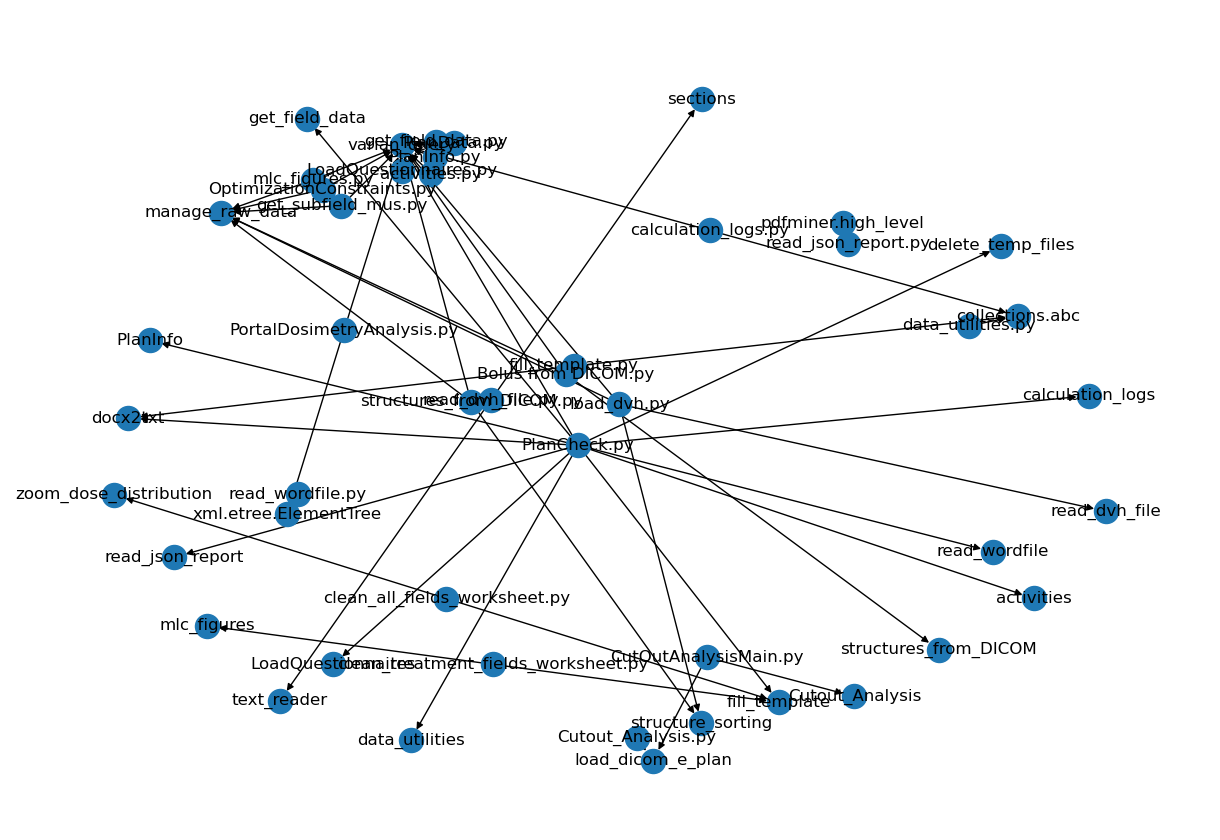

In [10]:
# Visualize Dependency Tree
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(filtered_dependency_graph)
nx.draw(filtered_dependency_graph, pos, with_labels=True)
plt.title("Module Dependency Tree")
plt.show()

# Generate Module Dependency Table
Create a table listing the local modules and third-party packages used by each module, excluding standard library modules and simplifying package names by dropping submodules.

In [ ]:
# Generate Module Dependency Table
import pandas as pd

# Prepare data for the table
module_dependency_data = []
for file, imports in {**python_imports, **notebook_imports}.items():
    file_name = file.name
    local_modules = [imp.split('.')[0] for imp in imports if imp not in standard_libs and imp not in third_party_packages and not any(imp.startswith(pkg + '.') for pkg in third_party_packages)]
    third_party = [imp.split('.')[0] for imp in imports if imp in third_party_packages or any(imp.startswith(pkg + '.') for pkg in third_party_packages)]
    module_dependency_data.append({
        'Module': file_name,
        'Local Modules': ', '.join(sorted(set(local_modules))),
        'Third-Party Packages': ', '.join(sorted(set(third_party)))
    })

# Create a DataFrame
dependency_table = pd.DataFrame(module_dependency_data)

# Display the table
print(dependency_table)

# Identify SQL Queries
Search for SQL queries in `.py` files and `.ipynb` notebooks, ensuring they are passed to the `varian_query` module.

In [ ]:
# Identify SQL Queries
def find_sql_queries_in_python(file_path):
    sql_pattern = re.compile(r'(SELECT|INSERT|UPDATE|DELETE|CREATE|DROP|ALTER)[\s\S]*?;', re.IGNORECASE)
    sql_queries = []
    with file_path.open('r', encoding='utf-8') as file:
        for line_number, line in enumerate(file, start=1):
            if 'varian_query' in line or 'run_query' in line:
                if sql_pattern.search(line):
                    sql_queries.append({'File': str(file_path), 'Line Number': line_number, 'SQL Query': sql_pattern.search(line).group()})
    return sql_queries

def find_sql_queries_in_notebook(file_path):
    sql_pattern = re.compile(r'(SELECT|INSERT|UPDATE|DELETE|CREATE|DROP|ALTER)[\s\S]*?;', re.IGNORECASE)
    sql_queries = []
    with file_path.open('r', encoding='utf-8') as file:
        notebook = json.load(file)
    for cell in notebook.get('cells', []):
        if cell.get('cell_type') == 'code':
            for line_number, line in enumerate(cell.get('source', []), start=1):
                if 'varian_query' in line or 'run_query' in line:
                    if sql_pattern.search(line):
                        sql_queries.append({'File': str(file_path), 'Line Number': line_number, 'SQL Query': sql_pattern.search(line).group()})
    return sql_queries

# Collect SQL queries from Python files
python_sql_queries = []
for file in py_files:
    python_sql_queries.extend(find_sql_queries_in_python(file))

# Collect SQL queries from Jupyter notebooks
notebook_sql_queries = []
for file in ipynb_files:
    notebook_sql_queries.extend(find_sql_queries_in_notebook(file))

# Combine and display all SQL queries
all_sql_queries = python_sql_queries + notebook_sql_queries
if all_sql_queries:
    print('Identified SQL Queries:')
    for query in all_sql_queries:
        print(query)